## Importing all the required libraries in the code

In [27]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
import scipy
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2,f_classif
from sklearn.feature_selection import SelectKBest

%matplotlib inline
sns.set(color_codes=True)

## Dataset 1 description

In [2]:
gene_data_1=pd.read_csv('Dataset_1_Training.csv',index_col='ID_REF')
gene_data_1=gene_data_1.T
n1=gene_data_1.shape[1]
print(gene_data_1.shape)
gene_data_1.head()

(130, 22285)


ID_REF,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_22276,gene_22277,gene_22278,gene_22279,gene_22280,gene_22281,gene_22282,gene_22283,CO: 1,CO: 2
Train_01,12.4440,8.3774,6.7866,10.2851,5.9064,8.3767,8.0356,6.6745,6.2325,6.8450,...,15.6236,15.2785,3.2915,3.6526,2.6412,1.2652,3.0690,2.0271,0.0,1.0
Train_02,12.2005,7.8592,8.0963,10.4624,4.9582,9.2973,7.0581,6.4607,6.9047,5.8878,...,15.3234,15.1286,3.3811,2.5880,4.4798,4.8098,3.1637,2.4758,0.0,1.0
Train_03,12.6709,8.6762,7.4812,10.1887,5.2332,9.1721,8.6061,7.0932,6.5940,5.6843,...,15.4604,15.2674,3.1665,3.9743,5.2597,4.3815,2.8034,2.4669,0.0,0.0
Train_04,11.6619,8.2557,7.9923,10.7705,6.3296,9.3777,8.4776,6.5878,6.0877,6.5169,...,15.5185,15.1655,4.0045,3.8503,5.9114,0.7882,3.1831,3.4820,0.0,0.0
Train_05,11.8397,8.7971,7.8321,10.2869,5.8389,7.0841,7.3419,7.3167,6.3456,6.1708,...,15.3143,14.9506,3.0514,3.2946,5.1537,3.9179,3.1881,2.9769,0.0,0.0


In [3]:
gene_data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, Train_01 to Train_130
Columns: 22285 entries, gene_1 to CO: 2
dtypes: float64(22285)
memory usage: 22.1+ MB


In [4]:
gene_data_1.iloc[:,n1-2:n1].describe()

ID_REF,CO: 1,CO: 2
count,130.000000,130.000000
mean,0.253846,0.407692
std,0.436894,0.493306
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.750000,1.000000
max,1.000000,1.000000


In [5]:
data_gene_1=gene_data_1.iloc[:,0:n1-2]

## Dataset 2 description

In [6]:
gene_data_2=pd.read_csv('Dataset_2_Training.csv',index_col='ID_REF')
gene_data_2=gene_data_2.T
n2=gene_data_2.shape[1]
print(gene_data_2.shape)
gene_data_2.head()

(340, 54679)


ID_REF,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_54670,gene_54671,gene_54672,gene_54673,gene_54674,gene_54675,CO: 3,CO: 4,CO: 5,CO: 6
Train_001,8.2843,8.7174,8.3019,11.8611,4.6883,9.8524,8.2301,4.8406,7.5667,8.4165,...,6.3546,7.2572,3.6080,3.9483,4.5200,4.5195,0.0,0.0,1.0,1.0
Train_002,9.0419,8.8729,8.4559,11.2112,5.7059,10.2263,7.9439,4.6463,6.1828,7.0852,...,4.9707,6.4847,5.1648,1.8369,3.8223,3.4288,0.0,0.0,1.0,1.0
Train_003,7.6171,8.3904,8.1184,11.0341,5.8050,9.5912,6.8044,4.0878,8.1184,7.3179,...,3.9571,6.2647,3.4216,4.7911,5.4910,3.8438,0.0,0.0,0.0,1.0
Train_004,9.6283,8.3840,9.9061,12.0571,5.1193,10.5774,8.1628,5.3257,5.6398,7.6829,...,4.6561,7.5776,6.2385,4.1413,5.3047,5.4693,0.0,0.0,0.0,1.0
Train_005,10.1735,9.1585,7.9649,11.0843,5.0119,8.7764,8.1379,3.6227,7.7334,7.6336,...,3.7007,3.8720,3.1052,5.4053,5.3599,2.8328,0.0,0.0,0.0,1.0


In [7]:
gene_data_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 340 entries, Train_001 to Train_340
Columns: 54679 entries, gene_1 to CO: 6
dtypes: float64(54679)
memory usage: 141.8+ MB


In [8]:
gene_data_2.iloc[:,n2-4:n2].describe()

ID_REF,CO: 3,CO: 4,CO: 5,CO: 6
count,340.000000,340.000000,340.000000,340.000000
mean,0.244118,0.150000,0.429412,0.588235
std,0.430196,0.357598,0.495722,0.492878
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [9]:
data_gene_2=gene_data_2.iloc[:,0:n2-4]

## Data Visualisation

0.0    97
1.0    33
Name: CO: 1, dtype: int64


c:\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CO: 1', ylabel='count'>

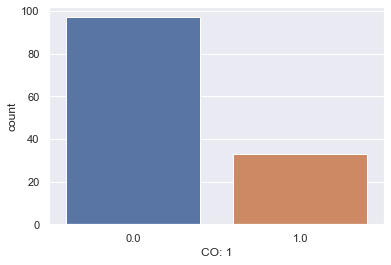

In [10]:
print(gene_data_1['CO: 1'].value_counts())
sns.countplot(gene_data_1['CO: 1'])

0.0    77
1.0    53
Name: CO: 2, dtype: int64


c:\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CO: 2', ylabel='count'>

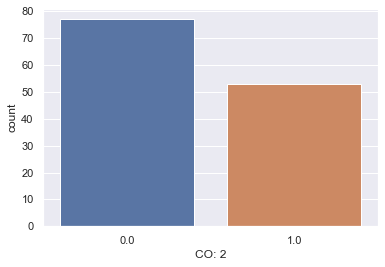

In [11]:
print(gene_data_1['CO: 2'].value_counts())
sns.countplot(gene_data_1['CO: 2'])

0.0    257
1.0     83
Name: CO: 3, dtype: int64


c:\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CO: 3', ylabel='count'>

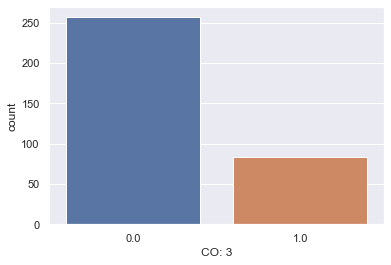

In [12]:
print(gene_data_2['CO: 3'].value_counts())
sns.countplot(gene_data_2['CO: 3'])

0.0    289
1.0     51
Name: CO: 4, dtype: int64


c:\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CO: 4', ylabel='count'>

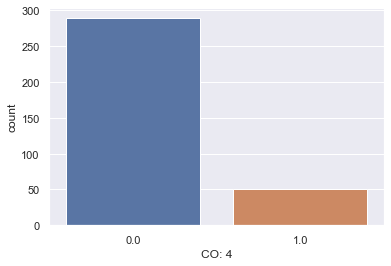

In [13]:
print(gene_data_2['CO: 4'].value_counts())
sns.countplot(gene_data_2['CO: 4'])

0.0    194
1.0    146
Name: CO: 5, dtype: int64


c:\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CO: 5', ylabel='count'>

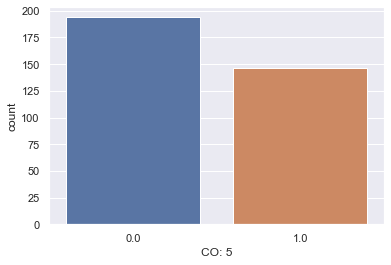

In [14]:
print(gene_data_2['CO: 5'].value_counts())
sns.countplot(gene_data_2['CO: 5'])

1.0    200
0.0    140
Name: CO: 6, dtype: int64


c:\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CO: 6', ylabel='count'>

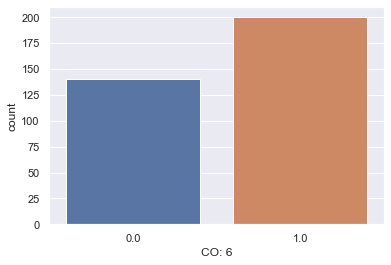

In [15]:
print(gene_data_2['CO: 6'].value_counts())
sns.countplot(gene_data_2['CO: 6'])

<AxesSubplot:xlabel='genes', ylabel='Train values'>

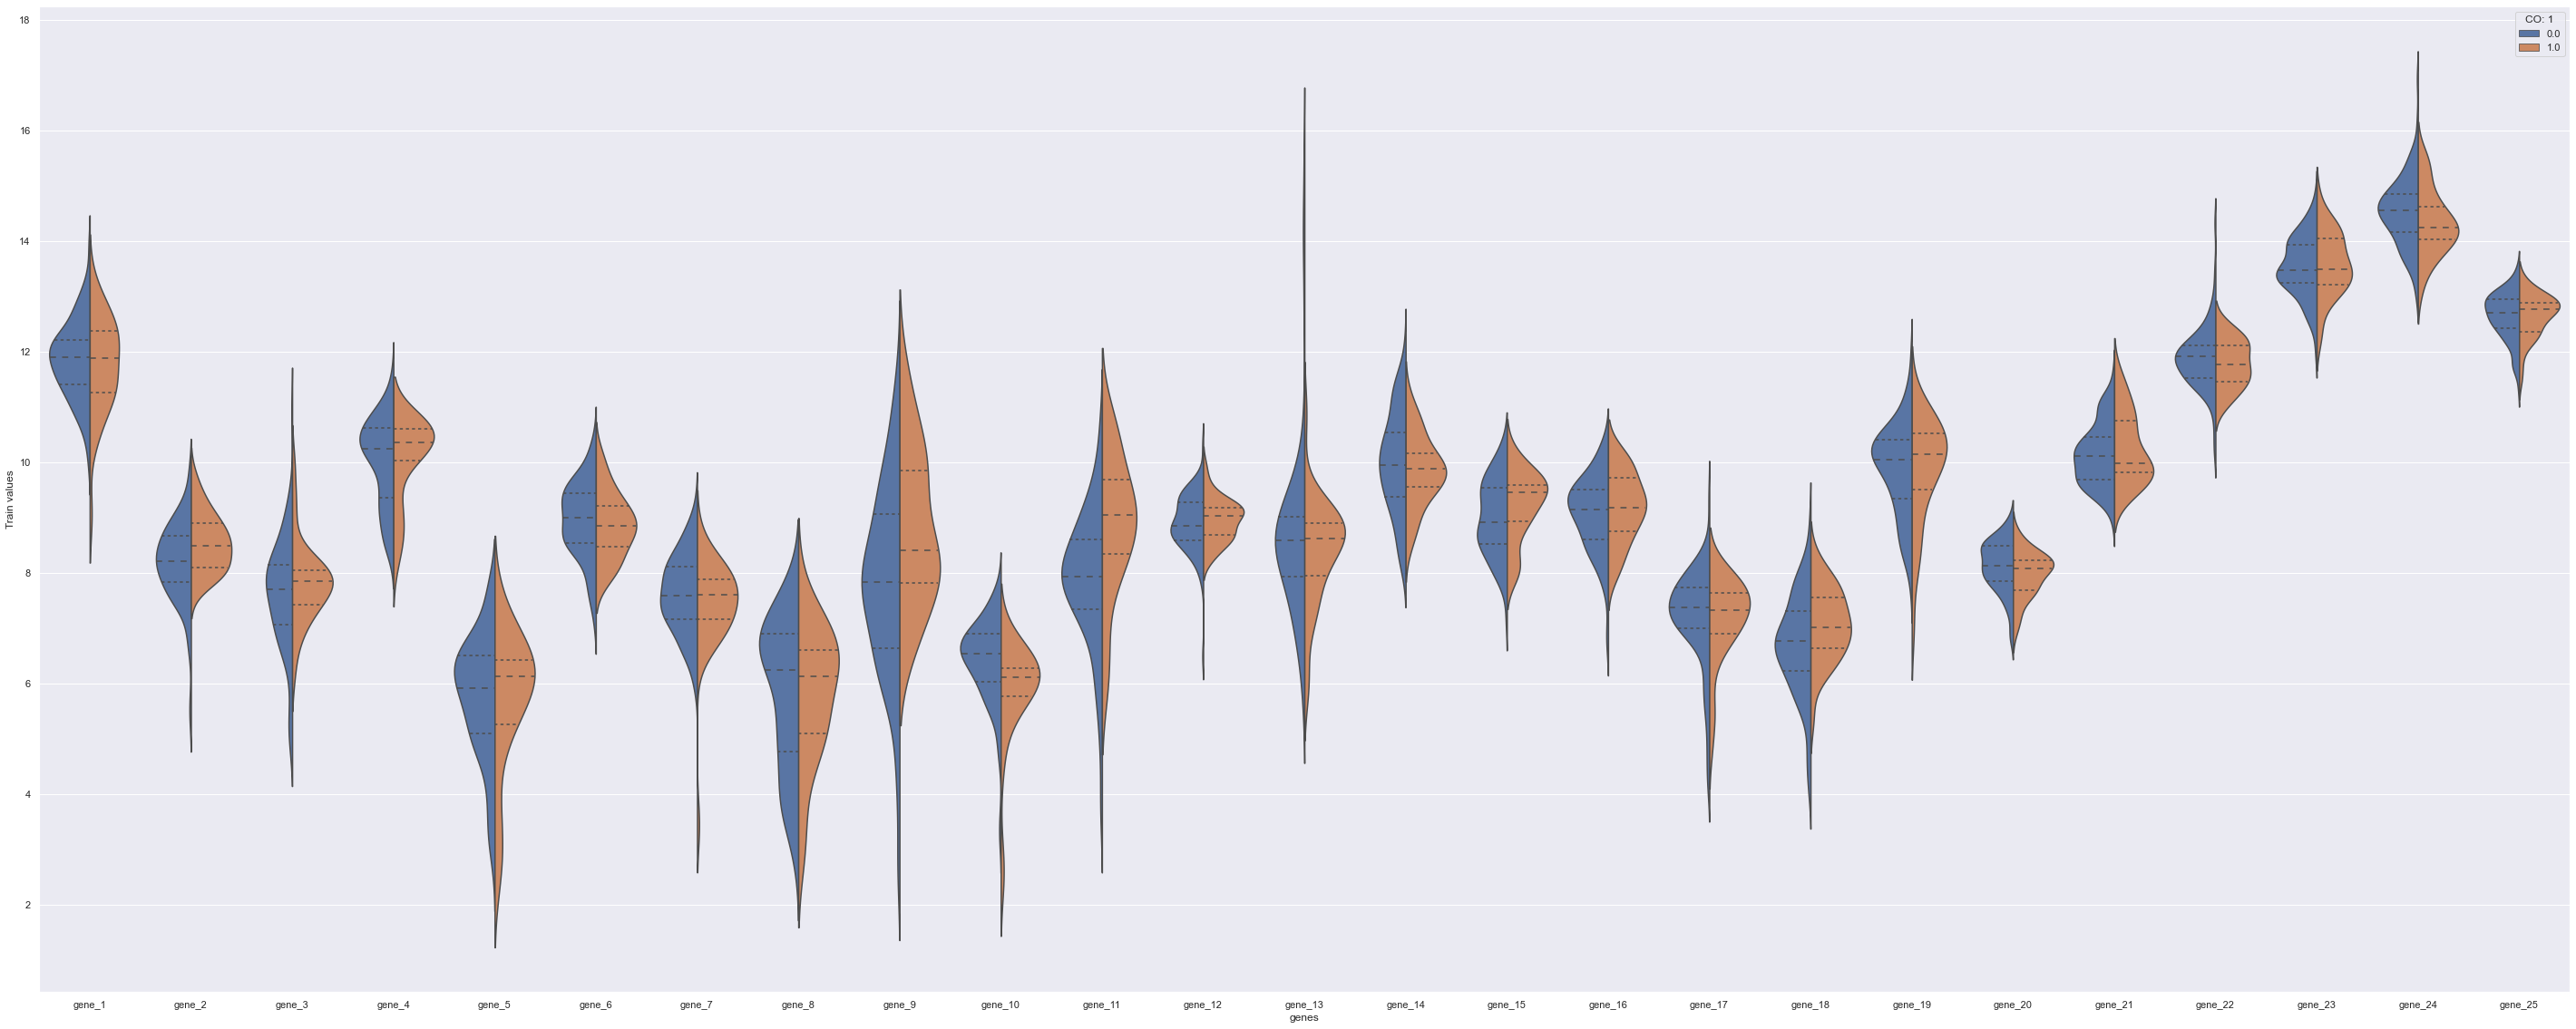

In [16]:
plt.figure(figsize=(50,20))
data=pd.concat([gene_data_1.iloc[:,n1-2:n1-1],data_gene_1.iloc[:,0:25]],axis=1)
data=pd.melt(data,id_vars="CO: 1",var_name="genes",value_name='Train values')
sns.violinplot(x="genes",y="Train values",hue="CO: 1",data=data,split=True,inner="quart")

In [17]:
#plt.figure(figsize=(15,5))
#plt.hist(data_gene_1,bins=100)

In [18]:
#sns.distplot(data_gene_1)

In [19]:
#plt.figure(figsize=(15,5))
#plt.hist(data_gene_2,bins=100)

In [20]:
#sns.distplot(data_gene_2)

## Feature Engineering

In [21]:
X1_data=data_gene_1
X2_data=data_gene_2
Y1=gene_data_1.iloc[:,n1-2:n1-1]
Y2=gene_data_1.iloc[:,n1-1:n1]
Y3=gene_data_2.iloc[:,n2-4:n2-3]
Y4=gene_data_2.iloc[:,n2-3:n2-2]
Y5=gene_data_2.iloc[:,n2-2:n2-1]
Y6=gene_data_2.iloc[:,n2-1:n2]

Y1=np.ravel(Y1)
Y2=np.ravel(Y2)
Y3=np.ravel(Y3)
Y4=np.ravel(Y4)
Y5=np.ravel(Y5)
Y6=np.ravel(Y6)

#scaler=StandardScaler()
#scaled_X1=scaler.fit_transform(X1_data)
#scaled_X2=scaler.fit_transform(X2_data)
#explained_variance_1=[]
#explained_variance_2=[]
X1_data[X1_data<0]=0
X2_data[X2_data<0]=0

#scaled_X1=X1_data
#scaled_X2=X2_data

#n1r=data_gene_1.shape[0]
#n2r=data_gene_2.shape[0]

<ipython-input-21-66d69dda7550>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1_data[X1_data<0]=0
c:\python\python38\lib\site-packages\pandas\core\frame.py:3215: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)
<ipython-input-21-66d69dda7550>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [22]:
scaled_X1,Y1=SMOTE(random_state=1234).fit_resample(X1_data,Y1)
Y1=pd.DataFrame(Y1)
print('CO1:\n',Y1[0].value_counts())
scaled_X2,Y2=SMOTE(random_state=1234).fit_resample(X1_data,Y2)
Y2=pd.DataFrame(Y2)
print('CO2:\n',Y2[0].value_counts())
scaled_X3,Y3=SMOTE(random_state=1234).fit_resample(X2_data,Y3)
Y3=pd.DataFrame(Y3)
print('CO3:\n',Y3[0].value_counts())
scaled_X4,Y4=SMOTE(random_state=1234).fit_resample(X2_data,Y4)
Y4=pd.DataFrame(Y4)
print('CO4:\n',Y4[0].value_counts())
scaled_X5,Y5=SMOTE(random_state=1234).fit_resample(X2_data,Y5)
Y5=pd.DataFrame(Y5)
print('CO5:\n',Y5[0].value_counts())
scaled_X6,Y6=SMOTE(random_state=1234).fit_resample(X2_data,Y6)
Y6=pd.DataFrame(Y6)
print('CO6:\n',Y6[0].value_counts())

CO1:
 0.0    97
1.0    97
Name: 0, dtype: int64
CO2:
 0.0    77
1.0    77
Name: 0, dtype: int64
CO3:
 0.0    257
1.0    257
Name: 0, dtype: int64
CO4:
 0.0    289
1.0    289
Name: 0, dtype: int64
CO5:
 0.0    194
1.0    194
Name: 0, dtype: int64
CO6:
 0.0    200
1.0    200
Name: 0, dtype: int64


In [25]:
print(Y1)
Y1.describe()
scaled_X1.describe()

       0
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
..   ...
189  1.0
190  1.0
191  1.0
192  1.0
193  1.0

[194 rows x 1 columns]


ID_REF,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_22274,gene_22275,gene_22276,gene_22277,gene_22278,gene_22279,gene_22280,gene_22281,gene_22282,gene_22283
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,11.859554,8.337337,7.693681,10.084121,5.723561,8.911121,7.581813,5.812710,8.369214,6.198220,...,8.164672,8.864273,15.837653,15.551881,3.872229,3.887565,4.408992,3.348618,4.228228,2.900042
std,0.726191,0.624591,0.816216,0.694844,1.058129,0.600703,0.671014,1.130162,1.607009,0.792100,...,0.777916,0.680421,0.508364,0.524389,0.755790,0.895494,1.145396,1.244474,1.129691,0.834306
min,9.051900,5.355500,4.954200,8.151000,2.483300,7.084100,3.446600,2.786400,2.718500,2.394500,...,5.087300,6.017500,14.692600,14.252800,2.075000,2.089700,1.445700,0.414200,1.646800,0.792100
25%,11.342525,7.995115,7.375181,9.732875,5.233026,8.525775,7.227483,5.093083,7.490825,5.979875,...,7.678325,8.407550,15.539688,15.254650,3.446543,3.282610,3.574341,2.386364,3.307008,2.374033
50%,11.937600,8.371650,7.814148,10.284750,5.955829,8.972758,7.622785,6.057390,8.229417,6.264449,...,8.025200,8.817806,15.814791,15.520964,3.798825,3.754433,4.350706,3.287443,4.011600,2.856363
75%,12.364932,8.704875,8.079830,10.593909,6.421916,9.308225,7.997275,6.686800,9.618859,6.646300,...,8.538962,9.176700,16.083350,15.780817,4.184396,4.389417,5.324300,4.253356,5.171643,3.397247
max,13.901200,9.833900,10.899400,11.548300,7.734000,10.453900,9.257700,7.893300,11.733600,7.760100,...,12.418700,11.245800,17.648700,17.371200,6.966100,6.562500,6.996500,6.013100,6.735300,6.482600


In [23]:
#for i in range(1,n1r+1):
#    pca=PCA(n_components=i)
#    pca.fit(scaled_X1)
#    explained_variance_1.append(np.sum(pca.explained_variance_ratio_))
#plt.plot(range(1,n1r+1),explained_variance_1)
#plt.xlabel("Number of Components in dataset 1")
#plt.ylabel("Variance Explained in dataset 1")

In [24]:
#for i in range(1,n2r+1):
#    pca=PCA(n_components=i)
#    pca.fit(scaled_X2)
#    explained_variance_2.append(np.sum(pca.explained_variance_ratio_))
#plt.plot(range(1,n2r+1),explained_variance_2)
#plt.xlabel("Number of Components in dataset 2")
#plt.ylabel("Variance Explained in dataset 2")

In [25]:
#model_1=PCA(n_components=100)
#X1=model_1.fit_transform(scaled_X1)

#model_2=PCA(n_components=100)
#X2=model_2.fit_transform(scaled_X2)

#X1=scaled_X1
#X2=scaled_X2

In [26]:
Y1=np.ravel(Y1)
Y2=np.ravel(Y2)
Y3=np.ravel(Y3)
Y4=np.ravel(Y4)
Y5=np.ravel(Y5)
Y6=np.ravel(Y6)

In [26]:
# k tells no of top features to be selected
# Score function Chi2 tells the feature to be selected using Chi Square
test=SelectKBest(score_func=f_classif,k=100)
#test=SelectKBest(score_func=chi2,k=200)
#test=SelectKBest(score_func=chi2,k=100)
#test=SelectKBest(k=500)

fit_1=test.fit(scaled_X1,Y1)
fit_1.scores_
X1=test.fit_transform(scaled_X1,Y1)
features_1=test.get_feature_names_out()

fit_2=test.fit(scaled_X2,Y2)
fit_2.scores_
X2=test.fit_transform(scaled_X2,Y2)
features_2=test.get_feature_names_out()

fit_3=test.fit(scaled_X3,Y3)
fit_3.scores_
X3=test.fit_transform(scaled_X3,Y3)
features_3=test.get_feature_names_out()

fit_4=test.fit(scaled_X4,Y4)
fit_4.scores_
X4=test.fit_transform(scaled_X4,Y4)
features_4=test.get_feature_names_out()

fit_5=test.fit(scaled_X5,Y5)
fit_5.scores_
X5=test.fit_transform(scaled_X5,Y5)
features_5=test.get_feature_names_out()

fit_6=test.fit(scaled_X6,Y6)
fit_6.scores_
X6=test.fit_transform(scaled_X6,Y6)
features_6=test.get_feature_names_out()

NameError: name 'f_classif' is not defined

In [28]:
scaler=StandardScaler()
X1=scaler.fit_transform(X1)
X2=scaler.fit_transform(X2)
X3=scaler.fit_transform(X3)
X4=scaler.fit_transform(X4)
X5=scaler.fit_transform(X5)
X6=scaler.fit_transform(X6)

## Training models

In [29]:
#splitting training and validating set
X_train1,X_val1,Y_train1,Y_val1=train_test_split(X1,Y1,test_size=0.3,random_state=0)
X_train2,X_val2,Y_train2,Y_val2=train_test_split(X2,Y2,test_size=0.3,random_state=0)
X_train3,X_val3,Y_train3,Y_val3=train_test_split(X3,Y3,test_size=0.3,random_state=0)
X_train4,X_val4,Y_train4,Y_val4=train_test_split(X4,Y4,test_size=0.3,random_state=0)
X_train5,X_val5,Y_train5,Y_val5=train_test_split(X5,Y5,test_size=0.3,random_state=0)
X_train6,X_val6,Y_train6,Y_val6=train_test_split(X6,Y6,test_size=0.3,random_state=0)

In [30]:
model1=GaussianNB()
model2=LogisticRegression()
model3=KNeighborsClassifier()
model4=RandomForestClassifier(max_depth=16, random_state=0)
model5=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=1,random_state=0)
model=[model1,model2,model3,model4,model5]

In [31]:
Y_pred1=[]
print('CO1:\n')
for i in model:
    i.fit(X_train1,Y_train1)
    pred=i.predict(X_val1)
    Y_pred1.append(pred)
    score=accuracy_score(Y_val1,pred)*100
    print(str(i),':')
    PS=precision_score(Y_val1,pred)
    RS=recall_score(Y_val1,pred)
    cm=confusion_matrix(Y_val1,pred)
    TN=cm[0][0]
    FN=cm[1][0]
    TP=cm[1][1]
    FP=cm[0][1]
    MCC=(TN*TP-FN*FP)/((TN+FN)*(TN+FP)*(TP+FN)*(TP+FP))**0.5
    print('Accuracy Score:',score)
    print('Evaluation score:',MCC)

CO1:

GaussianNB() :
Accuracy Score: 79.66101694915254
Evaluation score: 0.5995514939892591
LogisticRegression() :
Accuracy Score: 94.91525423728814
Evaluation score: 0.8969653425430084
KNeighborsClassifier() :
Accuracy Score: 81.35593220338984
Evaluation score: 0.6413734340835433
RandomForestClassifier(max_depth=16, random_state=0) :
Accuracy Score: 88.13559322033898
Evaluation score: 0.7607479396592285
GradientBoostingClassifier(max_depth=1, random_state=0) :
Accuracy Score: 91.52542372881356
Evaluation score: 0.8304992176989187


In [32]:
Y_pred2=[]
print('CO2:\n')
for i in model:
    i.fit(X_train2,Y_train2)
    pred=i.predict(X_val2)
    Y_pred2.append(pred)
    score=accuracy_score(Y_val2,pred)*100
    print(str(i),':')
    PS=precision_score(Y_val2,pred)
    RS=recall_score(Y_val2,pred)
    cm=confusion_matrix(Y_val2,pred)
    TN=cm[0][0]
    FN=cm[1][0]
    TP=cm[1][1]
    FP=cm[0][1]
    MCC=(TN*TP-FN*FP)/((TN+FN)*(TN+FP)*(TP+FN)*(TP+FP))**0.5
    print('Accuracy Score:',score)
    print('Evaluation score:',MCC)

CO2:

GaussianNB() :
Accuracy Score: 76.59574468085107
Evaluation score: 0.5421109737369988
LogisticRegression() :
Accuracy Score: 80.85106382978722
Evaluation score: 0.6209166124476994
KNeighborsClassifier() :
Accuracy Score: 76.59574468085107
Evaluation score: 0.5542269253708124
RandomForestClassifier(max_depth=16, random_state=0) :
Accuracy Score: 80.85106382978722
Evaluation score: 0.6209166124476994
GradientBoostingClassifier(max_depth=1, random_state=0) :
Accuracy Score: 80.85106382978722
Evaluation score: 0.6170609073445336


In [33]:
Y_pred3=[]
print('CO3:\n')
for i in model:
    i.fit(X_train3,Y_train3)
    pred=i.predict(X_val3)
    Y_pred3.append(pred)
    score=accuracy_score(Y_val3,pred)*100
    print(str(i),':')
    PS=precision_score(Y_val3,pred)
    RS=recall_score(Y_val3,pred)
    cm=confusion_matrix(Y_val3,pred)
    TN=cm[0][0]
    FN=cm[1][0]
    TP=cm[1][1]
    FP=cm[0][1]
    MCC=(TN*TP-FN*FP)/((TN+FN)*(TN+FP)*(TP+FN)*(TP+FP))**0.5
    print('Accuracy Score:',score)
    print('Evaluation score:',MCC)

CO3:

GaussianNB() :
Accuracy Score: 82.58064516129032
Evaluation score: 0.654473535882559
LogisticRegression() :
Accuracy Score: 87.09677419354838
Evaluation score: 0.7585674494892168
KNeighborsClassifier() :
Accuracy Score: 52.903225806451616
Evaluation score: 0.15394255231285187
RandomForestClassifier(max_depth=16, random_state=0) :
Accuracy Score: 92.25806451612904
Evaluation score: 0.8454621266272296
GradientBoostingClassifier(max_depth=1, random_state=0) :
Accuracy Score: 87.09677419354838
Evaluation score: 0.7483856933657224


In [34]:
Y_pred4=[]
print('CO4:\n')
for i in model:
    i.fit(X_train4,Y_train4)
    pred=i.predict(X_val4)
    Y_pred4.append(pred)
    score=accuracy_score(Y_val4,pred)*100
    print(str(i),':')
    PS=precision_score(Y_val4,pred)
    RS=recall_score(Y_val4,pred)
    cm=confusion_matrix(Y_val4,pred)
    TN=cm[0][0]
    FN=cm[1][0]
    TP=cm[1][1]
    FP=cm[0][1]
    MCC=(TN*TP-FN*FP)/((TN+FN)*(TN+FP)*(TP+FN)*(TP+FP))**0.5
    print('Accuracy Score:',score)
    print('Evaluation score:',MCC)

CO4:

GaussianNB() :
Accuracy Score: 82.18390804597702
Evaluation score: 0.6519880935901258
LogisticRegression() :
Accuracy Score: 93.67816091954023
Evaluation score: 0.8739170530087023
KNeighborsClassifier() :
Accuracy Score: 54.59770114942529
Evaluation score: 0.19337775979463945
RandomForestClassifier(max_depth=16, random_state=0) :
Accuracy Score: 92.52873563218391
Evaluation score: 0.8520992201133388
GradientBoostingClassifier(max_depth=1, random_state=0) :
Accuracy Score: 89.65517241379311
Evaluation score: 0.793313097618217


In [35]:
Y_pred5=[]
print('CO5:\n')
for i in model:
    i.fit(X_train5,Y_train5)
    pred=i.predict(X_val5)
    Y_pred5.append(pred)
    score=accuracy_score(Y_val5,pred)*100
    print(str(i),':')
    PS=precision_score(Y_val5,pred)
    RS=recall_score(Y_val5,pred)
    cm=confusion_matrix(Y_val5,pred)
    TN=cm[0][0]
    FN=cm[1][0]
    TP=cm[1][1]
    FP=cm[0][1]
    MCC=(TN*TP-FN*FP)/((TN+FN)*(TN+FP)*(TP+FN)*(TP+FP))**0.5
    print('Accuracy Score:',score)
    print('Evaluation score:',MCC)

CO5:

GaussianNB() :
Accuracy Score: 89.74358974358975
Evaluation score: 0.805814436514403
LogisticRegression() :
Accuracy Score: 92.3076923076923
Evaluation score: 0.8469686474269935
KNeighborsClassifier() :
Accuracy Score: 75.21367521367522
Evaluation score: 0.5754693659348942
RandomForestClassifier(max_depth=16, random_state=0) :
Accuracy Score: 86.32478632478633
Evaluation score: 0.7466228396982014
GradientBoostingClassifier(max_depth=1, random_state=0) :
Accuracy Score: 90.5982905982906
Evaluation score: 0.8209612675065708


In [36]:
Y_pred6=[]
print('CO6:\n')
for i in model:
    i.fit(X_train6,Y_train6)
    pred=i.predict(X_val6)
    Y_pred6.append(pred)
    score=accuracy_score(Y_val6,pred)*100
    print(str(i),':')
    PS=precision_score(Y_val6,pred)
    RS=recall_score(Y_val6,pred)
    cm=confusion_matrix(Y_val6,pred)
    TN=cm[0][0]
    FN=cm[1][0]
    TP=cm[1][1]
    FP=cm[0][1]
    MCC=(TN*TP-FN*FP)/((TN+FN)*(TN+FP)*(TP+FN)*(TP+FP))**0.5
    print('Accuracy Score:',score)
    print('Evaluation score:',MCC)

CO6:

GaussianNB() :
Accuracy Score: 69.16666666666667
Evaluation score: 0.39077846368315633
LogisticRegression() :
Accuracy Score: 74.16666666666667
Evaluation score: 0.48836260175331186
KNeighborsClassifier() :
Accuracy Score: 55.833333333333336
Evaluation score: 0.14717777039140906
RandomForestClassifier(max_depth=16, random_state=0) :
Accuracy Score: 65.83333333333333
Evaluation score: 0.3380765114113058
GradientBoostingClassifier(max_depth=1, random_state=0) :
Accuracy Score: 68.33333333333333
Evaluation score: 0.37892238288809893


## Test evaluation

In [37]:
gene_test_data_1=pd.read_csv('Dataset_1_Testing.csv',index_col='ID_REF')
gene_test_data_1=gene_test_data_1.T

gene_test_data_2=pd.read_csv('Dataset_2_Testing.csv',index_col='ID_REF')
gene_test_data_2=gene_test_data_2.T

In [38]:
gene_test_data_1[gene_test_data_1<0]=0
gene_test_data_2[gene_test_data_2<0]=0

Xtest_1=gene_test_data_1.reindex(columns=features_1)
Xtest_2=gene_test_data_1.reindex(columns=features_2)
Xtest_3=gene_test_data_2.reindex(columns=features_3)
Xtest_4=gene_test_data_2.reindex(columns=features_4)
Xtest_5=gene_test_data_2.reindex(columns=features_5)
Xtest_6=gene_test_data_2.reindex(columns=features_6)

In [39]:
scaler=StandardScaler()
Xtest_1=scaler.fit_transform(Xtest_1)
Xtest_2=scaler.fit_transform(Xtest_2)
Xtest_3=scaler.fit_transform(Xtest_3)
Xtest_4=scaler.fit_transform(Xtest_4)
Xtest_5=scaler.fit_transform(Xtest_5)
Xtest_6=scaler.fit_transform(Xtest_6)

In [40]:
model=LogisticRegression()
model2=RandomForestClassifier(max_depth=16,random_state=0)
#model=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=1,random_state=0)
#model2=GaussianNB()

model.fit(X1,Y1)
pred_1=model.predict(Xtest_1)
pred_1=pred_1.astype('int32')

model.fit(X2,Y2)
pred_2=model.predict(Xtest_2)
pred_2=pred_2.astype('int32')

model2.fit(X3,Y3)
pred_3=model2.predict(Xtest_3)
pred_3=pred_3.astype('int32')

model.fit(X4,Y4)
pred_4=model.predict(Xtest_4)
pred_4=pred_4.astype('int32')

model.fit(X5,Y5)
pred_5=model.predict(Xtest_5)
pred_5=pred_5.astype('int32')

model.fit(X6,Y6)
pred_6=model.predict(Xtest_6)
pred_6=pred_6.astype('int32')

In [41]:
Y_test_1=pd.DataFrame(pred_1,columns=['Predicted'])
id1=pd.DataFrame(list(range(0,100)),columns=['Id'])
CO1=pd.concat([id1,Y_test_1],join='outer',axis=1)

Y_test_2=pd.DataFrame(pred_2,columns=['Predicted'])
id2=pd.DataFrame(list(range(100,200)),columns=['Id'])
CO2=pd.concat([id2,Y_test_2],join='outer',axis=1)

Y_test_3=pd.DataFrame(pred_3,columns=['Predicted'])
id3=pd.DataFrame(list(range(200,414)),columns=['Id'])
CO3=pd.concat([id3,Y_test_3],join='outer',axis=1)

Y_test_4=pd.DataFrame(pred_4,columns=['Predicted'])
id4=pd.DataFrame(list(range(414,628)),columns=['Id'])
CO4=pd.concat([id4,Y_test_4],join='outer',axis=1)

Y_test_5=pd.DataFrame(pred_5,columns=['Predicted'])
id5=pd.DataFrame(list(range(628,842)),columns=['Id'])
CO5=pd.concat([id5,Y_test_5],join='outer',axis=1)

Y_test_6=pd.DataFrame(pred_6,columns=['Predicted'])
id6=pd.DataFrame(list(range(842,1056)),columns=['Id'])
CO6=pd.concat([id6,Y_test_6],join='outer',axis=1)

result=CO1.append(CO2,ignore_index=True)
result=result.append(CO3,ignore_index=True)
result=result.append(CO4,ignore_index=True)
result=result.append(CO5,ignore_index=True)
result=result.append(CO6,ignore_index=True)
result.head()

,Id,Predicted
0,0,0
1,1,1
2,2,1
3,3,0
4,4,0


In [42]:
result.to_csv('results.csv',index=False)